In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving ecommerce.csv to ecommerce (3).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['ecommerce.csv']))
data.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART


In [ ]:
data.shape

(700, 11)

In [ ]:
data.dtypes

InvoiceNo           int64
UnitPrice         float64
OrderValue        float64
Quantit             int64
Country            object
 InvoiceDate       object
InvoiceTime        object
Year-Month         object
Major Category     object
Minor Category     object
Description        object
dtype: object

In [ ]:
data.rename(columns={'Major Category': 'Major_Category'}, inplace=True)
data.rename(columns={'Minor Category': 'Minor_Category'}, inplace=True)
data.rename(columns={'Year-Month': 'Year_Month'}, inplace=True)

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year_Month'] = pd.to_datetime(data['Year_Month'])

In [ ]:
data.isnull().sum()

InvoiceNo         0
UnitPrice         0
OrderValue        0
Quantit           0
Country           0
InvoiceDate       0
InvoiceTime       0
Year_Month        0
Major_Category    0
Minor_Category    0
Description       0
dtype: int64

In [ ]:
data.loc[data[['InvoiceNo', 'OrderValue', 'InvoiceDate', 'InvoiceTime', 'Description']].duplicated(keep=False),:]

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year_Month,Major_Category,Minor_Category,Description


In [ ]:
data.describe()

,InvoiceNo,UnitPrice,OrderValue,Quantit
count,700.000000,700.000000,700.000000,700.000000
mean,559180.801429,3.367086,31.978471,20.865714
std,13246.185339,8.280695,63.658083,63.867322
min,536370.000000,0.120000,0.290000,1.000000
25%,547501.000000,1.250000,8.290000,3.000000
50%,559327.500000,1.950000,15.600000,8.000000
75%,570672.000000,3.750000,25.272500,16.000000
max,581587.000000,202.420000,633.600000,1152.000000


In [ ]:
i = data.loc[data['Quantit']==1152,:]
i

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year_Month,Major_Category,Minor_Category,Description
619,565145,0.55,633.6,1152,Australia,2011-01-09,13:50,2011-09-01,Garden,Seeds,SET/2 RED RETROSPOT TEA TOWELS


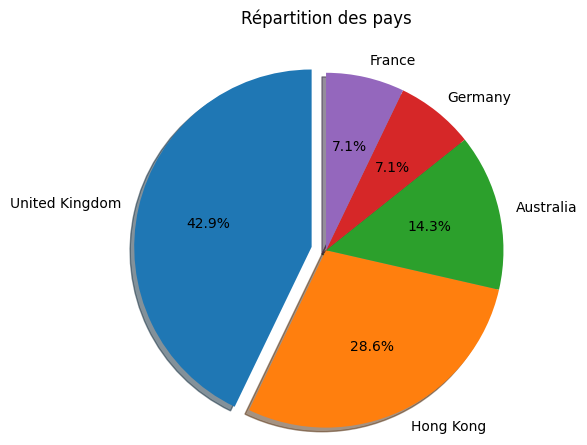

In [ ]:
Country_part = data["Country"].value_counts(normalize=True)
Country_list = ['United Kingdom', 'Hong Kong', 'Australia', 'Germany', 'France']
plt.pie(Country_part, labels = Country_list,startangle=90, shadow = True, explode = (0.1, 0, 0, 0, 0),radius = 1.2, autopct = '%1.1f%%')
plt.title('Répartition des pays', pad=30)
plt.show()

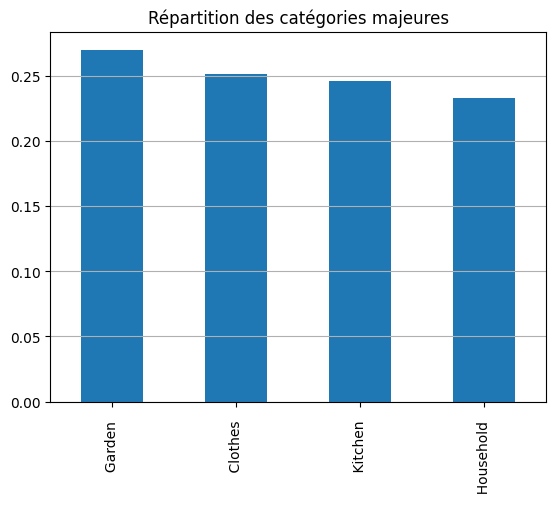

In [ ]:
data["Major_Category"].value_counts(normalize=True).plot(kind='bar')
plt.title('Répartition des catégories majeures')
plt.grid(axis='y')
plt.show()

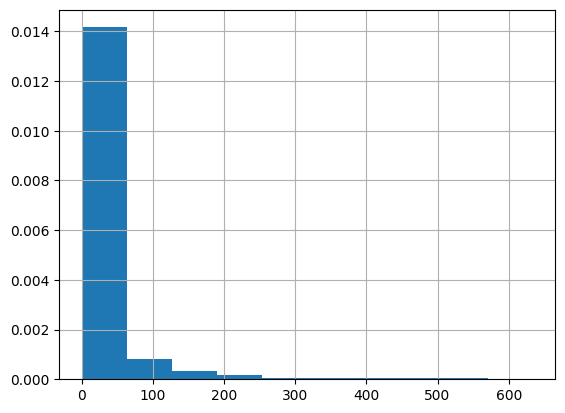

In [ ]:
data["OrderValue"].hist(density=True)
plt.show()

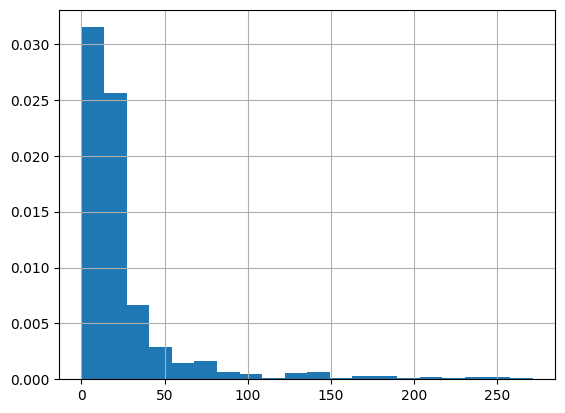

In [ ]:
data[data.OrderValue.abs() < 300]["OrderValue"].hist(density=True,bins=20)
plt.show()

--------------------
    Clothes  
moy:
 2.9942613636363635
med:
 1.725
mod:
 0    1.25
1    1.65
Name: UnitPrice, dtype: float64


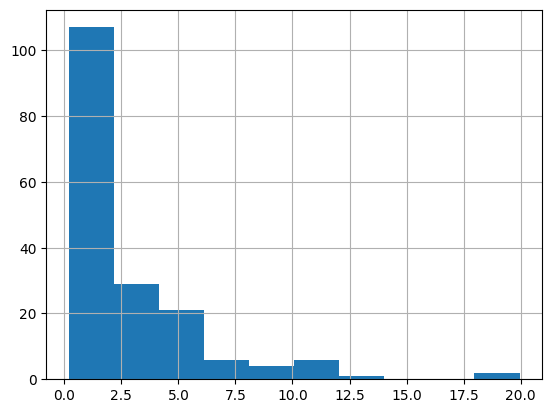

--------------------
    Kitchen  
moy:
 3.2978488372093024
med:
 2.08
mod:
 0    1.25
Name: UnitPrice, dtype: float64


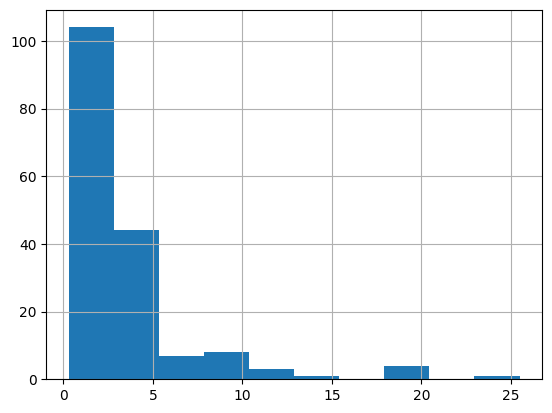

--------------------
     Garden  
moy:
 3.026878306878307
med:
 1.95
mod:
 0    1.65
Name: UnitPrice, dtype: float64


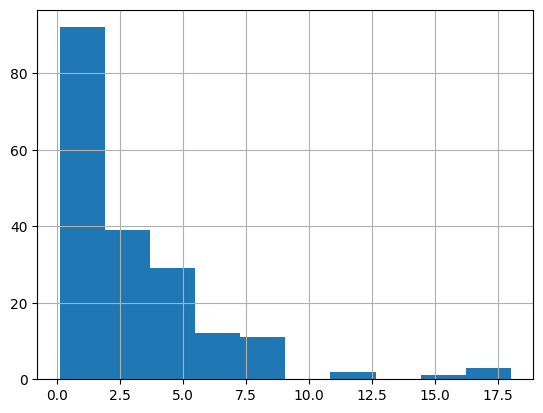

--------------------
  Household  
moy:
 4.23717791411043
med:
 1.95
mod:
 0    1.25
Name: UnitPrice, dtype: float64


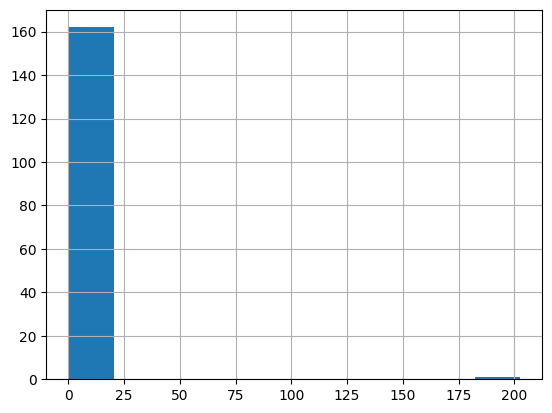

In [ ]:
for cat in data["Major_Category"].unique():
    subset = data.loc[data.Major_Category == cat, :]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['UnitPrice'].mean())
    print("med:\n",subset['UnitPrice'].median())
    print("mod:\n",subset['UnitPrice'].mode())
    subset["UnitPrice"].hist()
    plt.show()

--------------------
    Clothes  
moy:
 2.9942613636363635
med:
 1.725
mod:
 0    1.25
1    1.65
Name: UnitPrice, dtype: float64
var:
 9.845360818052685
ect:
 3.1377317951113484
skw:
 2.504610341449081


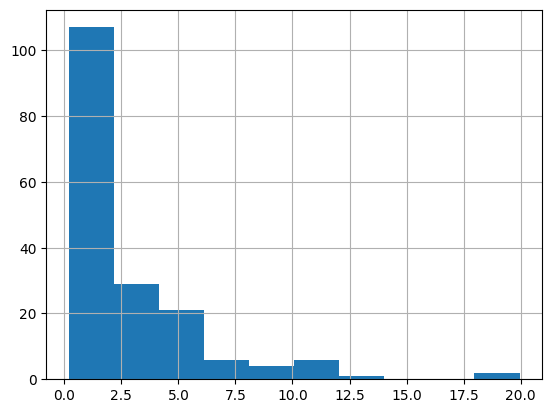

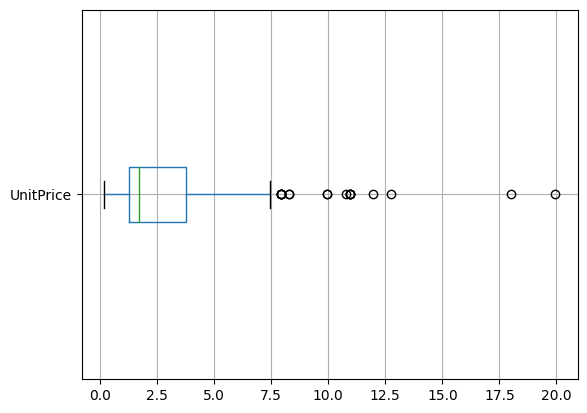

--------------------
    Kitchen  
moy:
 3.2978488372093024
med:
 2.08
mod:
 0    1.25
Name: UnitPrice, dtype: float64
var:
 14.462730837614926
ect:
 3.80298972357472
skw:
 2.941466758740036


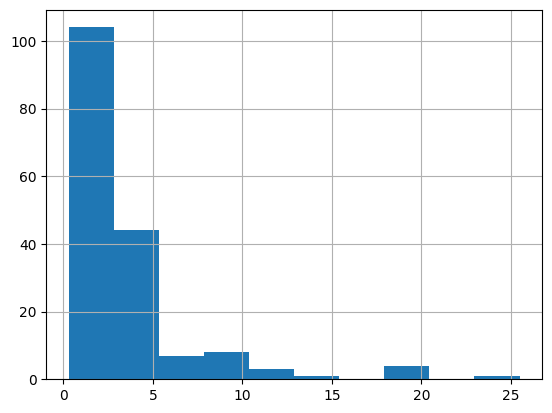

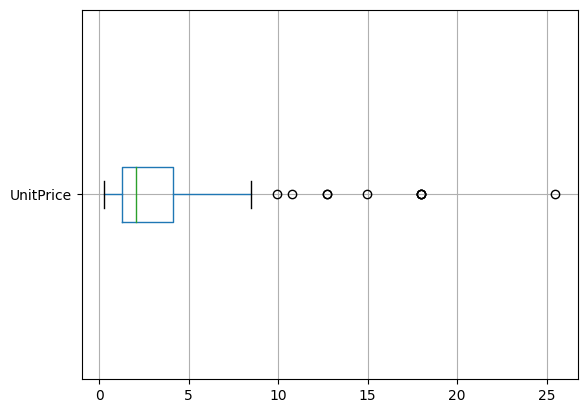

--------------------
     Garden  
moy:
 3.026878306878307
med:
 1.95
mod:
 0    1.65
Name: UnitPrice, dtype: float64
var:
 9.771764329106128
ect:
 3.125982138321671
skw:
 2.504479524741256


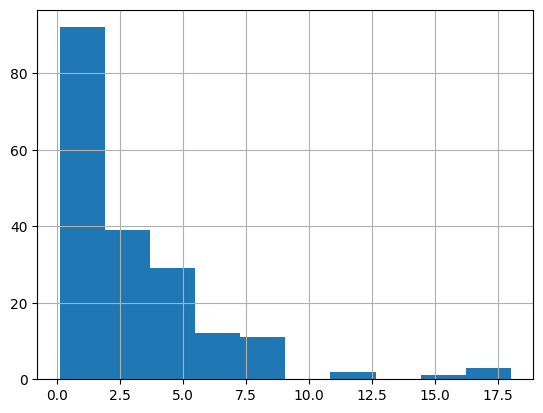

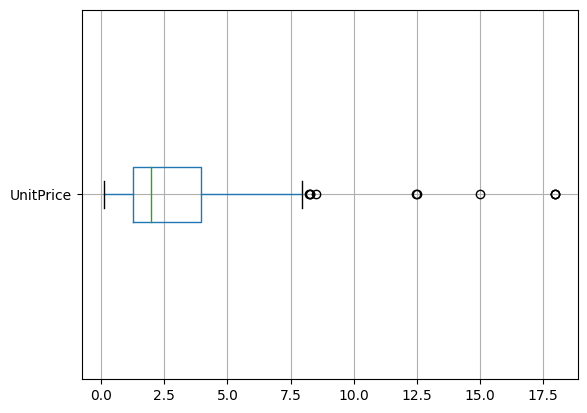

--------------------
  Household  
moy:
 4.23717791411043
med:
 1.95
mod:
 0    1.25
Name: UnitPrice, dtype: float64
var:
 255.7825871278558
ect:
 15.99320440461685
skw:
 11.802437264688185


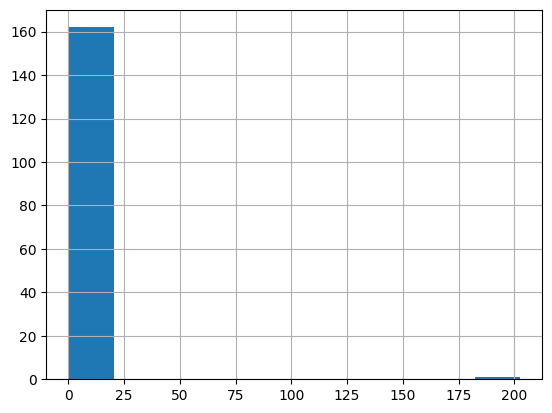

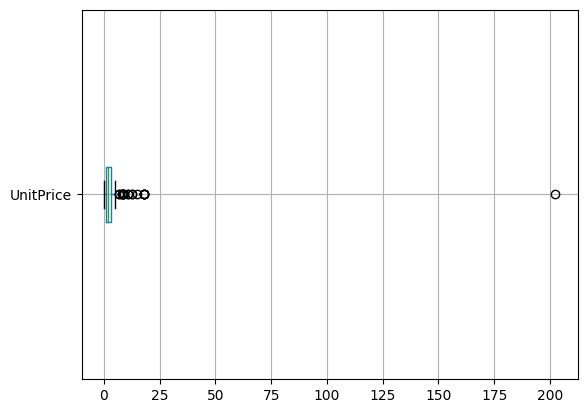

In [ ]:
for cat in data["Major_Category"].unique():
    subset = data[data.Major_Category == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['UnitPrice'].mean())
    print("med:\n",subset['UnitPrice'].median())
    print("mod:\n",subset['UnitPrice'].mode())
    print("var:\n",subset['UnitPrice'].var(ddof=0))
    print("ect:\n",subset['UnitPrice'].std(ddof=0))
    print("skw:\n",subset['UnitPrice'].skew())
    subset["UnitPrice"].hist()
    plt.show()
    subset.boxplot(column="UnitPrice", vert=False)
    plt.show()

--------------------
    Clothes  
moy:
 2.9942613636363635
med:
 1.725
mod:
 0    1.25
1    1.65
Name: UnitPrice, dtype: float64
var:
 9.845360818052685
ect:
 3.1377317951113484
skw:
 2.504610341449081


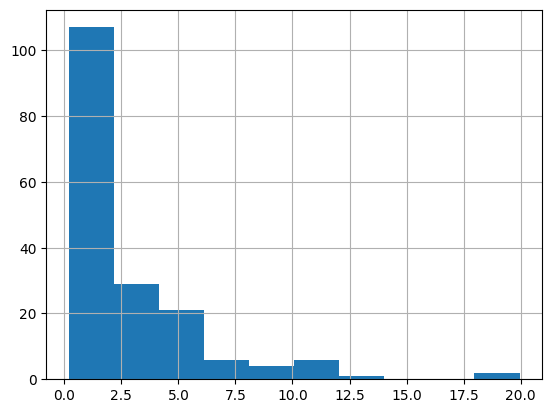

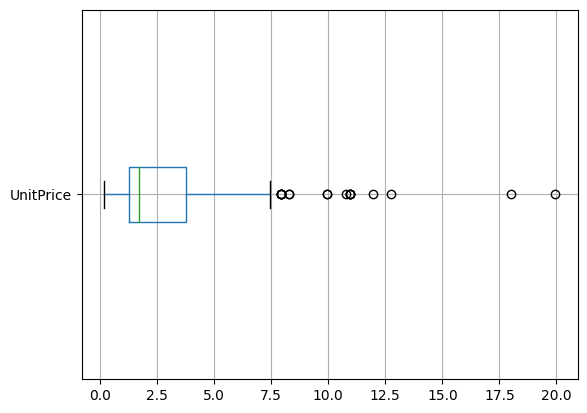

--------------------
    Kitchen  
moy:
 3.2978488372093024
med:
 2.08
mod:
 0    1.25
Name: UnitPrice, dtype: float64
var:
 14.462730837614926
ect:
 3.80298972357472
skw:
 2.941466758740036


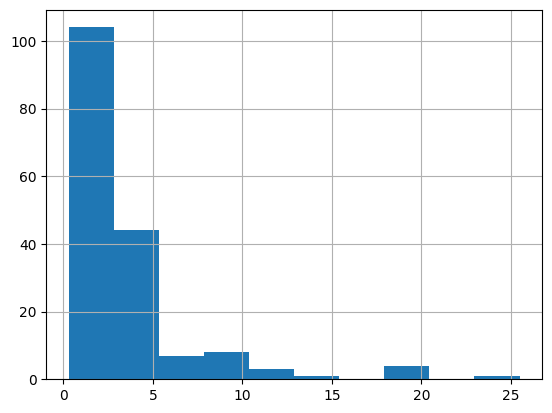

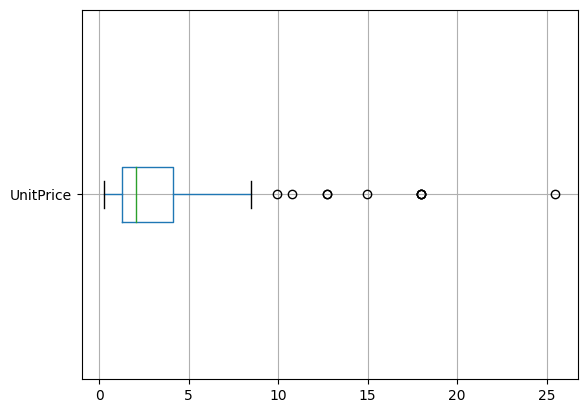

--------------------
     Garden  
moy:
 3.026878306878307
med:
 1.95
mod:
 0    1.65
Name: UnitPrice, dtype: float64
var:
 9.771764329106128
ect:
 3.125982138321671
skw:
 2.504479524741256


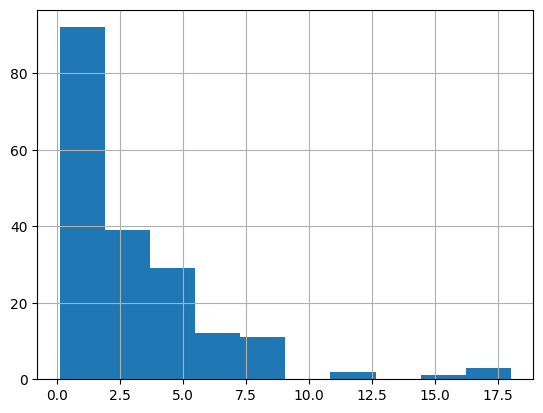

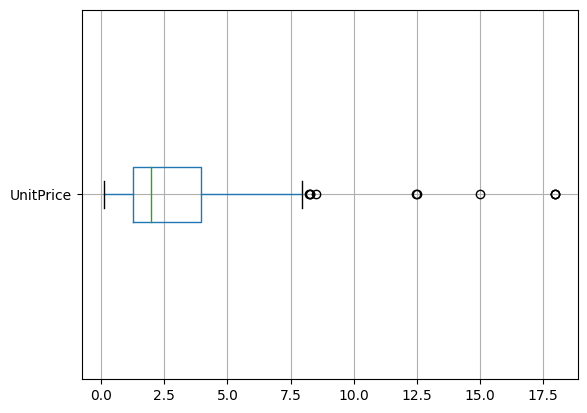

--------------------
  Household  
moy:
 4.23717791411043
med:
 1.95
mod:
 0    1.25
Name: UnitPrice, dtype: float64
var:
 255.7825871278558
ect:
 15.99320440461685
skw:
 11.802437264688185


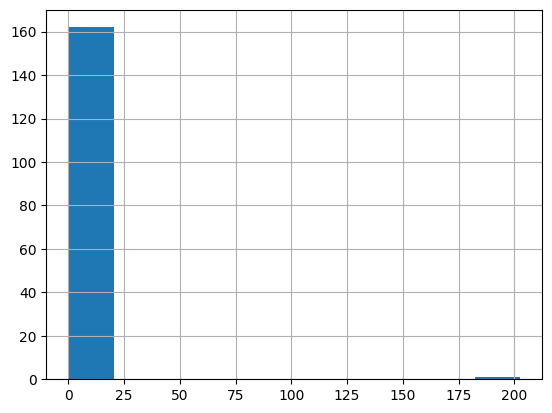

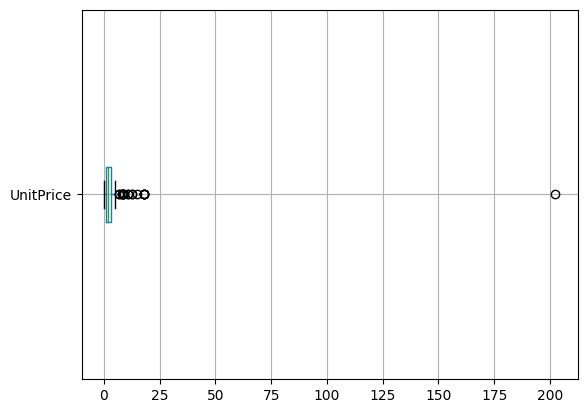

In [ ]:
  for cat in data["Major_Category"].unique():
    subset = data[data.Major_Category == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['UnitPrice'].mean())
    print("med:\n",subset['UnitPrice'].median())
    print("mod:\n",subset['UnitPrice'].mode())
    print("var:\n",subset['UnitPrice'].var(ddof=0))
    print("ect:\n",subset['UnitPrice'].std(ddof=0))
    print("skw:\n",subset['UnitPrice'].skew())
    subset["UnitPrice"].hist()
    plt.show()
    subset.boxplot(column="UnitPrice", vert=False)
    plt.show()

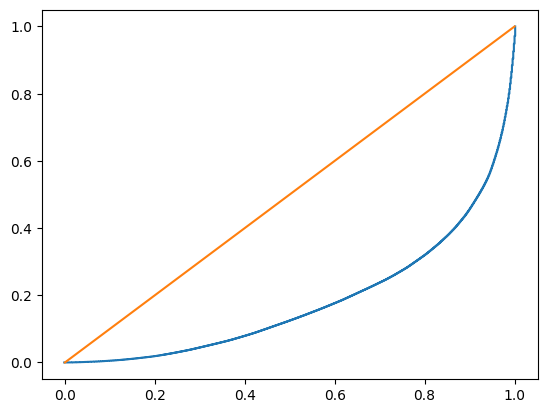

In [ ]:
mont = data['OrderValue'].values
n = len(mont)
lorenz = np.cumsum(np.sort(mont)) / mont.sum()
lorenz = np.append([0],lorenz)

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1])
plt.show()

In [ ]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
gini

0.6294842844206859

La quantité d'articles achetés est-elle plus importante lorsque le prix des articles est bas? Nous cherchons à comparer Quantit et UnitValue

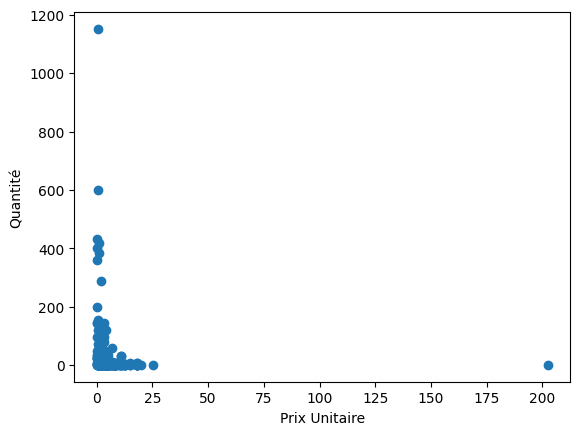

In [ ]:
plt.plot(data["UnitPrice"], data["Quantit"],'o')
plt.xlabel("Prix Unitaire")
plt.ylabel("Quantité")
plt.show()

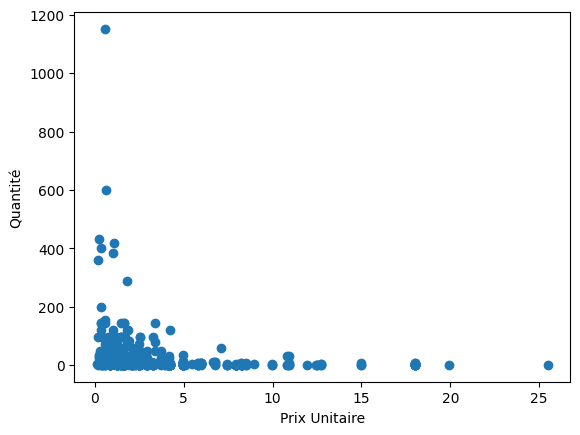

In [ ]:
prix = data[data.UnitPrice < 30]
plt.plot(prix["UnitPrice"], prix["Quantit"],'o')
plt.xlabel("Prix Unitaire")
plt.ylabel("Quantité")
plt.show()

In [ ]:
taille_classe = 5

groupes = []

tranches = np.arange(0, max(prix["UnitPrice"]), taille_classe)
tranches += taille_classe/2
indices = np.digitize(prix["UnitPrice"], tranches)

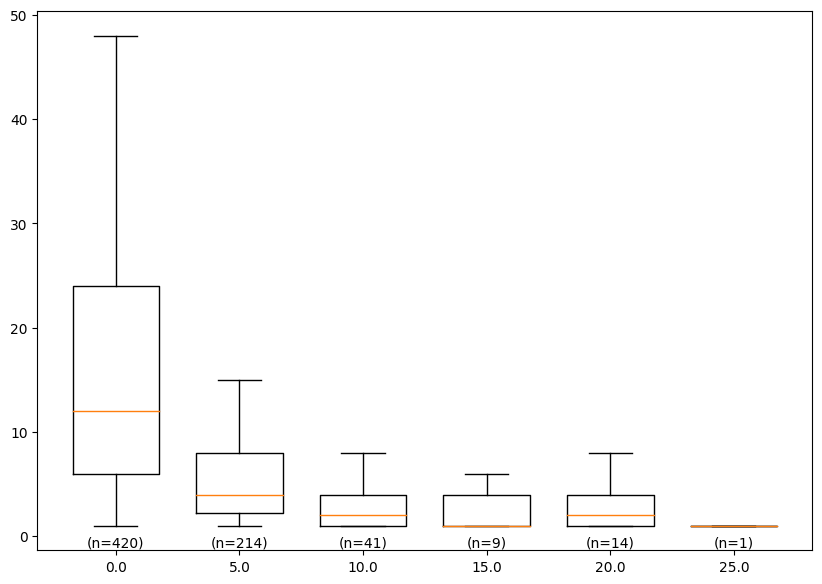

In [ ]:
for ind, tr in enumerate(tranches):
    quantite = prix.loc[indices==ind,"Quantit"]
    if len(quantite) > 0:
        g = {
            'valeurs': quantite,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(quantite),
            'quartiles': [np.percentile(quantite,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))

plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes],
            showfliers= False,
            widths= taille_classe*0.7)

for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')
plt.show()

Existe-t-il une corrélation entre le montant total des achats et la quantité de produits achetés? Nous allons comparer OrderValue et Quantit

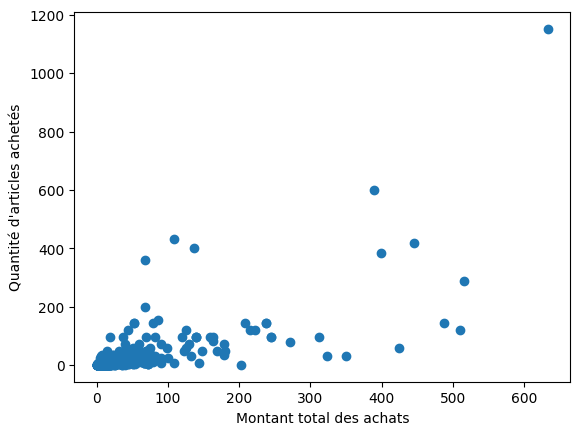

In [ ]:
plt.plot(data["OrderValue"], data["Quantit"],'o')
plt.xlabel("Montant total des achats")
plt.ylabel("Quantité d'articles achetés")
plt.show()

In [ ]:
import statsmodels.api as sm
Y = data['Quantit']
X = data[['OrderValue']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['OrderValue'],result.params['intercept']

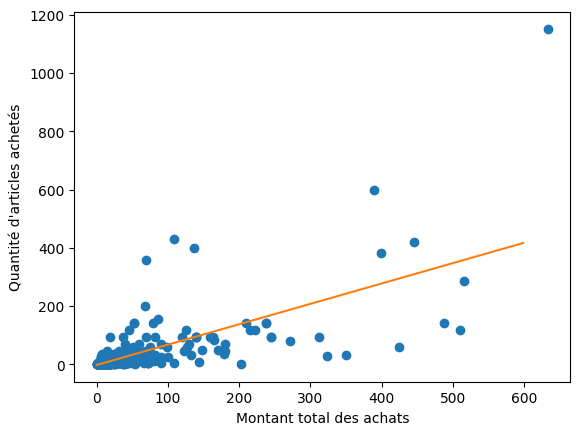

In [ ]:
plt.plot(data.OrderValue, data.Quantit, "o")
plt.plot(np.arange(600),[a*x+b for x in np.arange(600)])
plt.xlabel("Montant total des achats")
plt.ylabel("Quantité d'articles achetés")
plt.show()

In [ ]:
print(a, b, result.rsquared)

0.6988558026174312 -1.482626030978584 0.48520453218848514


Le montant total des achats est-il différent en fonction de la catégorie majeure? Nous allons comparer OrderValue et Major_Category

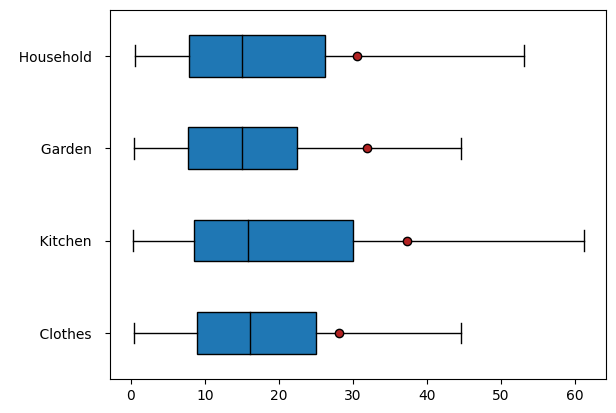

In [ ]:
X = "Major_Category" # qualitative
Y = "OrderValue" # quantitative

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [ ]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(data[X], data[Y])

0.002722946267058949

La categorie d'articles achetés dépend-t-elle du pays d'achat? Nous allons comparer Major_Category et Country.

In [ ]:
X = "Major_Category"
Y = "Country"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

Country,France,Germany,Australia,Hong Kong,United Kingdom,Total
Major_Category,,,,,,
Garden,63,29,9,15,73,189
Clothes,44,29,10,14,79,176
Kitchen,53,21,17,8,73,172
Household,40,21,14,13,75,163
Total,200,100,50,50,300,700


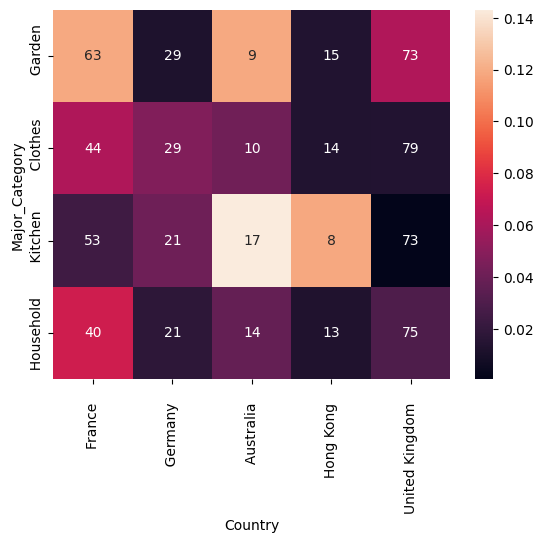

In [ ]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()